# EE 341 - Lab 2
## Introduction to Image Processing
## Khoa Tran and Anup Paudel

### Import the important packages

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import simpleaudio as sa
from scipy.io import wavfile

## Task1: Implement a Moving Average Filter

Implementation of a moving average filter using `signal.lfilter` and `signal.convolve`on a 100-second sinusoidal signal.

C:\Users\tynou\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


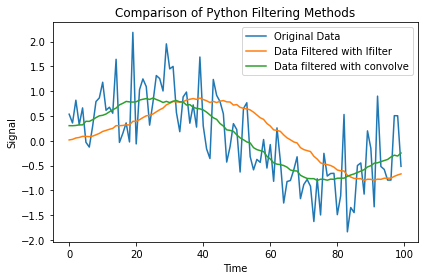

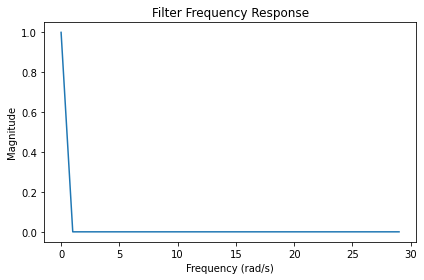

In [4]:
# Load the 100-second signal
data = np.genfromtxt('signal_data.txt')

# Create the impulse response. In this example, we have h[𝑛]= 1/10*(𝑢[𝑛]−𝑢[𝑛−10])
h = np.ones(30) / 30

# Apply this filter to the 100-second signal using both lfilter and convolve.
y_lfilter = signal.lfilter(h, 1, data)
y_convolve = signal.convolve(data, h, mode='same') / sum(h)

# Plot the filtering results
plt.figure()
plt.plot(data)
plt.plot(y_lfilter)
plt.plot(y_convolve)
plt.title('Comparison of Python Filtering Methods')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend(['Original Data', 'Data Filtered with lfilter', 'Data filtered with convolve'])
plt.tight_layout()

# Show the system frequency response
plt.figure()
plt.plot(np.fft.fft(h))
plt.title('Filter Frequency Response')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Magnitude')
plt.tight_layout()
plt.show()

C:\Users\tynou\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


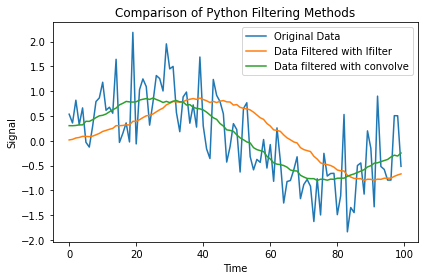

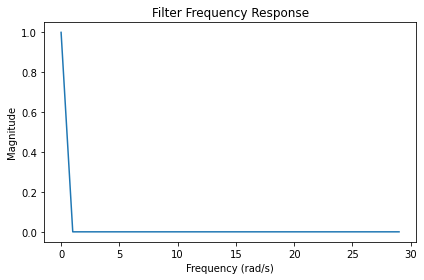

In [6]:
# Moving Average Filter

# Load the 100-second signal
data = np.genfromtxt('signal_data.txt')

# Create the impulse response. In this example, we have h[𝑛]= 1/30*(𝑢[𝑛]−𝑢[𝑛−30])
h1 = np.ones(30) / 30

# Apply this filter to the 100-second signal using both lfilter and convolve.
y_lfilter1 = signal.lfilter(h1, 1, data)
y_convolve1 = signal.convolve(data, h1, mode='same') / sum(h1)

# Plot the filtering results
plt.figure()
plt.plot(data)
plt.plot(y_lfilter1)
plt.plot(y_convolve1)
plt.title('Comparison of Python Filtering Methods')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.legend(['Original Data', 'Data Filtered with lfilter', 'Data filtered with convolve'])
plt.tight_layout()

# Show the system frequency response
plt.figure()
plt.plot(np.fft.fft(h1))
plt.title('Filter Frequency Response')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Magnitude')
plt.tight_layout()
plt.show()

Analysis:
    The filtered result looks smoother for both methods of implementation though lfilter and convolve as it averages out the original data, eliminating spikes with the filter. The difference between the two implemenation of lfilter and convolve is that the fir filter is simply a weighted average of current and past inputs, resulting in the signal being shifted up and to the left. To make the implementations identical, make the convolved signal be shifted to the left and upwards, taking into account past and current inputs. 

In [5]:
# Creating the Butterworth filter

#b, a = signal.butter(order, W, 'lowpass')

In [6]:
# Creating window-method filter

# Lowpass:
#b = signal.firwin(num_taps, W)
# Highpass:
#b = signal.firwin(num_taps, W, pass_zero = False)

## Task 2: Analyze the Characteristics of Filters

Analysis of 4 different filters using Butterworth and window-method designs.

In [7]:
def analyze(b, a, title):
    b = np.reshape(b, -1)
    a = np.reshape(a, -1)
    fig = plt.figure(figsize=(10, 8))
    fig.suptitle(title, fontsize='x-large')
    fig.subplots_adjust(hspace=0.5, wspace=0.3)

    # Plot frequency response
    w, h = signal.freqz(b, a, 1024)
    w_majors = np.array([0, 0.2, 0.4, 0.6, 0.8, 1]) * np.pi
    w_labels = ['0', r'$0.2\pi$', r'$0.4\pi$', r'$0.6\pi$', r'$0.8\pi$', r'$\pi$']
    ax = fig.add_subplot(221)
    ax.plot(w, 20 * np.log10(np.abs(h)))
    ax.set_xticks(w_majors)
    ax.set_xticklabels(w_labels)
    ax.set_title('Magnitude Response')
    ax.set_xlabel('Frequency [rad]')
    ax.set_ylabel('Gain [dB]')
    ax = fig.add_subplot(222)
    ax.plot(w, np.rad2deg(np.unwrap(np.angle(h))))
    ax.set_xticks(w_majors)
    ax.set_xticklabels(w_labels)
    ax.set_title('Phase Response')
    ax.set_xlabel('Frequency [rad]')
    ax.set_ylabel('Phase [deg]')

    # Plot impulse response
    x = np.zeros(50)
    x[0] = 1
    y = signal.lfilter(b, a, x)
    ax = fig.add_subplot(223)
    ax.stem(np.arange(len(y)), y)
    ax.set_title('Impulse Response')
    ax.set_xlabel('Time')
    ax.set_ylabel('Output')

    # Plot poles & zeros
    n_taps = max(len(b), len(a))
    b = np.pad(b, (0, n_taps - len(b)), 'constant')
    a = np.pad(a, (0, n_taps - len(a)), 'constant')
    z, p, k = signal.tf2zpk(b, a)
    ax = fig.add_subplot(224, projection='polar')

    ax.plot(np.angle(p), np.abs(p), 'x')
    ax.plot(np.angle(z), np.abs(z), 'o', markerfacecolor='none')
    lines, labels = ax.set_rgrids([1])
    for line in lines: line.set_color('black')
    ax.set_thetagrids([0, 90, 180, 270], ['Re(z)', 'Im(z)'])
    ax.set_rlabel_position(0)
    ax.spines['polar'].set_visible(False)
    ax.set_title('Poles & Zeros', y=1.1)

Analyze the characteristics of 4 filters:
1. Low pass Butterworth IIR filter
2. Low pass Window-method FIR filter
3. High pass Butterworth IIR filter
4. High pass Window-method IIR filter

Here, we show the example of analyzing (1) Low Pass IIR filter using Butterworth design and (2) Low Pass FIR filter using window-method design.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


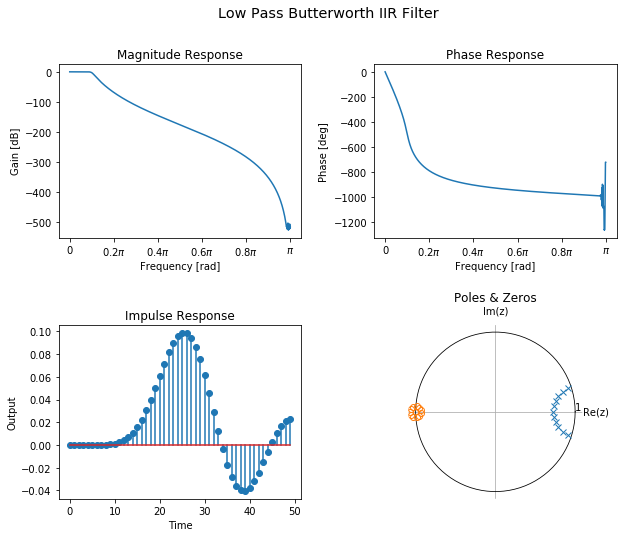

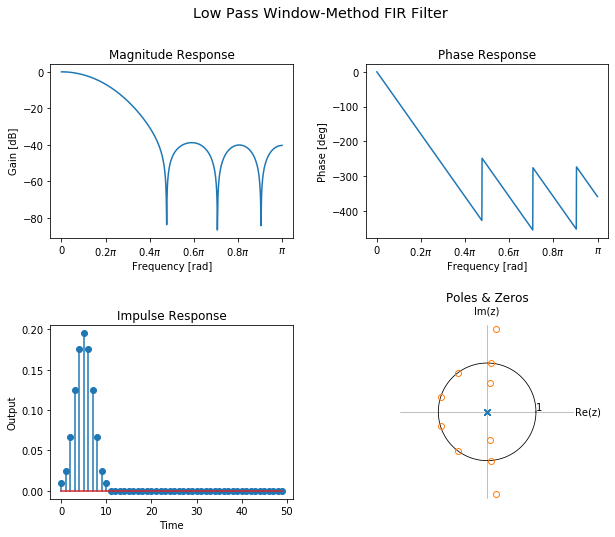

In [8]:
# Each filter should have an order of 10 and a cutoff frequency of ω=0.1𝜋.
order = 10

# Low Pass Butterworth filter
b, a = signal.butter(order+1, 0.1, 'lowpass')
# Use the analyze function
analyze(b, a, 'Low Pass Butterworth IIR Filter')

# Low Pass window-method filter
b = signal.firwin(order+1, 0.1)
# Use the analyze function
analyze(b, 1, 'Low Pass Window-Method FIR Filter')

Here, we show the example of analyzing (3) High Pass IIR filter using Butterworth design and (4) High Pass IIR filter using window-method design.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


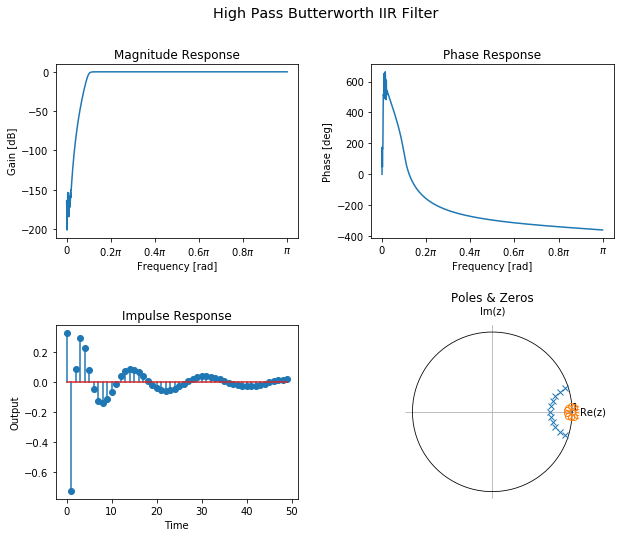

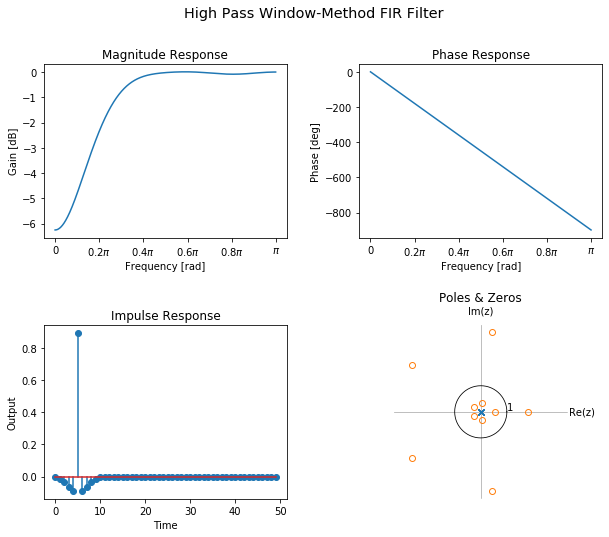

In [17]:
# Each filter should have an order of 10 and a cutoff frequency of ω=0.1𝜋.

order = 10

# High Pass Butterworth filter
b, a = signal.butter(order+1, 0.1, 'highpass')
# Use the analyze function
analyze(b, a, 'High Pass Butterworth IIR Filter')

# High Pass window-method filter
b = signal.firwin(order+1, 0.1, pass_zero = False)
# Use the analyze function
analyze(b, 1, 'High Pass Window-Method FIR Filter')

Finally, apply each filter to the each of the following signals:
1. The data in `microsoft_stock.txt`
2. A pulse of length 20: 𝑥[𝑛]=𝑢[𝑛]−𝑢[𝑛−20]

Here, we show an example of applying each of the filters to (1) microsoft stock data.

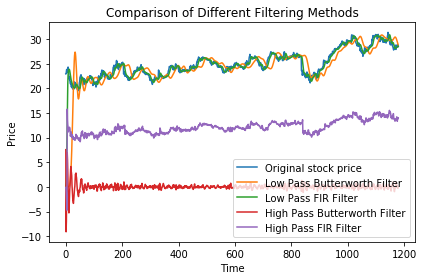

In [18]:
# Load the Microsoft stock data
data = np.genfromtxt('microsoft_stock.txt')

# Low Pass Butterworth filter
b1, a1 = signal.butter(11, 0.1, 'lowpass')
# Apply the filter to the stock data
y_butterlow = signal.lfilter(b1, a1, data)

# Low Pass window-method filter
b2 = signal.firwin(11, 0.1)
# Apply the filter to the stock data
y_firlow = signal.lfilter(b2, 1, data)

# High Pass Butterworth filter
b3, a3 = signal.butter(11, 0.1, 'highpass')
# Apply the filter to the stock data
y_butterhigh = signal.lfilter(b3, a3, data)

# High Pass window-method filter
b4 = signal.firwin(11, 0.1, pass_zero = False)
# Apply the filter to the stock data
y_firhigh = signal.lfilter(b4, 1, data)

plt.figure()
plt.plot(data)
plt.plot(y_butterlow)
plt.plot(y_firlow)
plt.plot(y_butterhigh)
plt.plot(y_firhigh)
plt.title('Comparison of Different Filtering Methods')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(['Original stock price','Low Pass Butterworth Filter', 'Low Pass FIR Filter', 'High Pass Butterworth Filter', 'High Pass FIR Filter'])
plt.tight_layout()
plt.show()

Here, we show an example of applying each of the filters to (2) impulse of length 20.

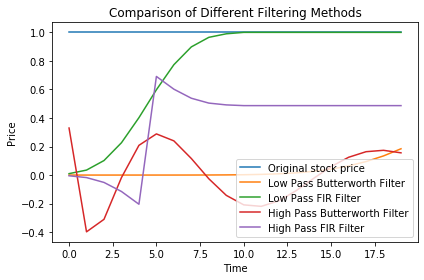

In [28]:
# Load the pulse data
#data : 𝑥[𝑛] = 𝑢[𝑛] − 𝑢[𝑛−20]
data = np.ones(20)

# Low Pass Butterworth filter
b1, a1 = signal.butter(11, 0.1, 'lowpass')
# Apply the filter to the stock data
y_butterlow = signal.lfilter(b1, a1, data)

# Low Pass window-method filter
b2 = signal.firwin(11, 0.1)
# Apply the filter to the stock data
y_firlow = signal.lfilter(b2, 1, data)

# High Pass Butterworth filter
b3, a3 = signal.butter(11, 0.1, 'highpass')
# Apply the filter to the stock data
y_butterhigh = signal.lfilter(b3, a3, data)

# High Pass window-method filter
b4 = signal.firwin(11, 0.1, pass_zero = False)
# Apply the filter to the stock data
y_firhigh = signal.lfilter(b4, 1, data)

plt.figure()
plt.plot(data)
plt.plot(y_butterlow)
plt.plot(y_firlow)
plt.plot(y_butterhigh)
plt.plot(y_firhigh)
plt.title('Comparison of Different Filtering Methods')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(['Original stock price','Low Pass Butterworth Filter', 'Low Pass FIR Filter', 'High Pass Butterworth Filter',
            'High Pass FIR Filter'], loc = 'lower right')
plt.tight_layout()
plt.show()

Analysis:
    Between the high pass filter and the low pass filter, the frequency response is much different as the magnitude for high pass filters starts at a negative dB and goes towards zero, while it is the opposite for low pass filters, starting at zero and goes to negative. The phase response for both filters are relatively the same, however, it is close to an ideal filter as the gain is 0dB in the passband, allowing the amplitude to neither decrease nor increase. The outputs of the filters on Microsoft's daily stock price is different as the low pass filter is similar to the original data as it allows for higher frequencies, while the high pass filter shows similar movement but on a lower scale. 

### Part II: Audio Equalizer
Table 1: Filter coefficients of the equalizer
Filter Coefficients Which filter? (LP, HP or BP?)
b1 = [11.713, 0, -23.4257, 0, 11.713]
a1 = [1800, -6656.7, 9341, -5896.1, 1413.4]
Answer:BP
b2 = [0.2982, 0.89471, 0.89471, 0.2982]
a2 = [1800, -4989.8, 4625.2, -1433]
Answer:LP
b3 = [688.1, -2752.5, 4128.71, -2752.47, 688.12]
a3 = [1000, -3256.6, 4033.77, -2246, 473.51]
Answer:HP

## Task 3:Implement the 3-Band Equalizer

Implementation of 3-band equalizer through different gains and filters

In [8]:
# Load a WAV file. 
# Return the sampling rate and the sample array. 
def wav_load(file_name): 
    # Load the raw data. 
    sr, data = wavfile.read(file_name) 
    # Only use the first channel. 
    if data.ndim > 1: 
        data = data[:, 0] 
    
    # Convert to float32 quantization. 
    kind = data.dtype.kind 
    bits = data.dtype.itemsize * 8 
    data = data.astype('float32') 
    if kind == 'i' or kind == 'u': 
        data = data / 2 ** (bits - 1) 
        if kind == 'u': 
            data = data - 1 
    return sr, data

def play(samples, sample_rate): 
    sa.play_buffer((np.clip(samples, -1, 1) * 32767).astype('int16'), 1, 2, sample_rate).wait_done()

Then, implement the equalizer by writing a function `equalizer` including 4 steps:

1. Take a sound signal and the gain terms 𝐺1,𝐺2 and 𝐺3 as inputs
2. Apply the filters
3. Multiply the filter outputs by the gain terms
4. Sum the results

You should use the function `signal.lfilter` and the filter coefficients provided in Table 1 in the handout. For examle, you can apply a filter by using `signal.lfilter(b1, a1, samples)`



In addition, the gain terms supplied to the function should be in decibels (dB). For example, if the gain term is 0 dB, it means that

   sound level = 20 log ($p_{measured}/p_{reference}$) = 20 log 1 = 0 dB
                                  
This level occurs when the measured intensity $p_{measured}$ is equal to the reference level $p_{reference}$.


In [9]:
def equalizer(samples, g1, g2, g3):
    
    # Bandpass
    b1 = [11.713, 0, -23.4257, 0, 11.713] 
    a1 = [1800, -6656.7, 9341, -5896.1, 1413.4]
    
    # Lowpass
    b2 = [0.2982, 0.89471, 0.89471, 0.2982] 
    a2 = [1800, -4989.8, 4625.2, -1433]
    
    # Highpass
    b3 = [688.1, -2752.5, 4128.71, -2752.47, 688.12] 
    a3 = [1000, -3256.6, 4033.77, -2246, 473.51]    

    # implement the equalizer here
    y1 = signal.lfilter(b1, a1, samples)
    y2 = signal.lfilter(b2, a2, samples)
    y3 = signal.lfilter(b3, a3, samples)
    
    # decibel conversion
    dB1 = 10**(g1/20.0)
    dB2 = 10**(g2/20.0)
    dB3 = 10**(g3/20.0)
    
    y1 *= dB1
    y2 *= dB2
    y3 *= dB3

    return y1 + y2 + y3


In [10]:
# load the audio file
sample_rate, data = wav_load('music.wav')
# play the audio
play(data, sample_rate)

In [12]:
# apply the equalizer, the gain terms 𝐺1 = 𝐺2 = 𝐺3 = 0 dB
new_data = equalizer(data, 0, 0, 0)
# verify that it sounds the same as the original input
play(new_data, sample_rate)

In [17]:
# apply the equalizer, the gain terms 𝐺1 = 𝐺2 = 0 dB and G3 = -40
new_data = equalizer(data, 0, 0, -40)
# verify that it sounds the same as the original input
play(new_data, sample_rate)

In [18]:
# apply the equalizer, the gain terms 𝐺1 = 𝐺3 = 0 dB and G2 = -40
new_data = equalizer(data, 0, -40, -0)
# verify that it sounds the same as the original input
play(new_data, sample_rate)

In [16]:
# apply the equalizer, the gain terms 𝐺1 = -40 dB and 𝐺2 = 𝐺3 = 0 dB
new_data = equalizer(data, -40, 0, 0)
# verify that it sounds the same as the original input
play(new_data, sample_rate)

With different sets of gains, the sound alters based on the filter that is implemented. When having all gains at 0, the sound stays the same as it is unaffected by the filters, but with a gain of -40 on G1, higher frequencies are attenuates, while a gain of -40 on G3 attenuates lower frequencies with more bass. Lastly, with the gain of -40 on G2, both low and high frequencies are cutoff as the mid is increased. 